# **Step 1:** Import drivers.csv, countries.csv, and nationality.csv to merge all three together for a cleaned dataframe with "country_name", "latitude", and "longtitude" #

In [1]:
# Importing dependencies
import pandas as pd

In [2]:
# Importing driver.csv data into a dataframe
drivers_df = pd.read_csv('Resources/drivers.csv')
drivers_df.head()

# Dropping "driverRef","number","code", and "url" columns from drivers_df
drivers_df = drivers_df[['driverId', 'forename', 'surname', 'dob', 'nationality']]
drivers_df.head()

# Changing column names to be more intuitive for drivers_df
drivers_df=drivers_df.rename(columns = {
                                        'driverId': 'driver_id', 
                                        'forename': 'first_name', 
                                        'surname': 'last_name'
                                        })
drivers_df

,driver_id,first_name,last_name,dob,nationality
0,1,Lewis,Hamilton,1985-01-07,British
1,2,Nick,Heidfeld,1977-05-10,German
2,3,Nico,Rosberg,1985-06-27,German
3,4,Fernando,Alonso,1981-07-29,Spanish
4,5,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...
854,856,Nyck,de Vries,1995-02-06,Dutch
855,857,Oscar,Piastri,2001-04-06,Australian
856,858,Logan,Sargeant,2000-12-31,American
857,859,Liam,Lawson,2002-02-11,New Zealander


In [3]:
# Finding all unique nationalities in drivers_df
unique_nationalities = drivers_df['nationality'].unique()

print(unique_nationalities)

['British' 'German' 'Spanish' 'Finnish' 'Japanese' 'French' 'Polish'
 'Brazilian' 'Italian' 'Australian' 'Austrian' 'American' 'Dutch'
 'Colombian' 'Portuguese' 'Canadian' 'Indian' 'Hungarian' 'Irish' 'Danish'
 'Argentine' 'Czech' 'Malaysian' 'Swiss' 'Belgian' 'Monegasque' 'Swedish'
 'Venezuelan' 'New Zealander' 'Chilean' 'Mexican' 'South African'
 'Liechtensteiner' 'Rhodesian' 'American-Italian' 'Uruguayan'
 'Argentine-Italian' 'Thai' 'East German' 'Russian' 'Indonesian' 'Chinese']


In [4]:
# Replacing nationality names for merge of lat and long later in code
nationality_replacements_driversdf = {
    "American-Italian": "Italian",
    "Argentine-Italian": "Italian",
    "East German": "German"
}

drivers_df['nationality'] = drivers_df['nationality'].replace(nationality_replacements_driversdf, regex=True)

# Filtering out rows that have 'Rhodesian' and 'Liechtensteiner' in the nationality column to avoid incorrect merging for lat and long
drivers_df = drivers_df[(drivers_df['nationality'] != 'Rhodesian') & (drivers_df['nationality'] != 'Liechtensteiner')]

drivers_df.head()

,driver_id,first_name,last_name,dob,nationality
0,1,Lewis,Hamilton,1985-01-07,British
1,2,Nick,Heidfeld,1977-05-10,German
2,3,Nico,Rosberg,1985-06-27,German
3,4,Fernando,Alonso,1981-07-29,Spanish
4,5,Heikki,Kovalainen,1981-10-19,Finnish


In [5]:
# Importing nationality.csv data into a dataframe
nationality_df = pd.read_csv('Resources/nationality.csv')

# Dropping "num_code","alpha_2_code" and "alpha_3_code" columns from nationality_df
nationality_df = nationality_df[['en_short_name', 'nationality']]

# Changing column names to be more intuitive for nationality_df
nationality_df=nationality_df.rename(columns = {'en_short_name': 'country_name'})
nationality_df.head()

,country_name,nationality
0,Afghanistan,Afghan
1,Åland Islands,Åland Island
2,Albania,Albanian
3,Algeria,Algerian
4,American Samoa,American Samoan


In [6]:
# Replacing nationality names for merge of lat and long later in code
nationality_replacements_natdf = {
    "British, UK": "British",
    "Dutch, Netherlandic": "Dutch",
    'Hungarian, Magyar': "Hungarian",
    "Monégasque, Monacan": "Monegasque",
    "New Zealand, NZ": "New Zealander",
    "American-Italian": "Italian",
    "Argentine-Italian": "Italian",
    "East German": "German"
}

# Replacing country names for merge of lat and long later in code
nationality_df['nationality'] = nationality_df['nationality'].replace(nationality_replacements_natdf, regex=True)


# Replacements dictionary for country names
country_replacements_natdf = {
    "Russian Federation": "Russia",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    r"Venezuela \(Bolivarian Republic of\)": "Venezuela",
    "United States Minor Outlying Islands": "United States",
    "United States of America": "United States",
    "Czech Republic": "Czechia"
}

# Replacing country names for merge of lat and long later in code
nationality_df['country_name'] = nationality_df['country_name'].replace(country_replacements_natdf, regex=True)

nationality_df.head()

,country_name,nationality
0,Afghanistan,Afghan
1,Åland Islands,Åland Island
2,Albania,Albanian
3,Algeria,Algerian
4,American Samoa,American Samoan


In [7]:
# Importing countries.csv data into a dataframe
countries_df = pd.read_csv('Resources/countries.csv')

# Dropping "country" column from countries_df
countries_df = countries_df[['latitude', 'longitude', 'name']]

# Changing column names to be more intuitive for nationality_df
countries_df=countries_df.rename(columns = {'name': 'country_name'})

countries_df

,latitude,longitude,country_name
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla
...,...,...,...
242,15.552727,48.516388,Yemen
243,-12.827500,45.166244,Mayotte
244,-30.559482,22.937506,South Africa
245,-13.133897,27.849332,Zambia


In [8]:
# Joining nationality_df into drivers_df through a left join on "nationality" to get "country_name"
merged_drivers_df = drivers_df.merge(nationality_df, on = 'nationality', how = 'left')

# Dropping the duplicate drivers that were created through the join
no_dupe_merged_drivers_df = merged_drivers_df.drop_duplicates(subset='driver_id', keep='first').reset_index(drop=True)

# Joining countries_df into no_dupe_merged_drivers_df through a left join on "country_name" to get "latitude" and "longtitude" which will be used for creating a map
cleaned_merged_drivers_df = no_dupe_merged_drivers_df.merge(countries_df, on = 'country_name', how = 'left')
cleaned_merged_drivers_df

,driver_id,first_name,last_name,dob,nationality,country_name,latitude,longitude
0,1,Lewis,Hamilton,1985-01-07,British,United Kingdom,55.378051,-3.435973
1,2,Nick,Heidfeld,1977-05-10,German,Germany,51.165691,10.451526
2,3,Nico,Rosberg,1985-06-27,German,Germany,51.165691,10.451526
3,4,Fernando,Alonso,1981-07-29,Spanish,Spain,40.463667,-3.749220
4,5,Heikki,Kovalainen,1981-10-19,Finnish,Finland,61.924110,25.748151
...,...,...,...,...,...,...,...,...
849,856,Nyck,de Vries,1995-02-06,Dutch,Netherlands,52.132633,5.291266
850,857,Oscar,Piastri,2001-04-06,Australian,Australia,-25.274398,133.775136
851,858,Logan,Sargeant,2000-12-31,American,United States,37.090240,-95.712891
852,859,Liam,Lawson,2002-02-11,New Zealander,New Zealand,-40.900557,174.885971


In [9]:
# Count null values in each column to check that merging was succesfull
null_counts = cleaned_merged_drivers_df.isnull().sum()
null_counts

driver_id       0
first_name      0
last_name       0
dob             0
nationality     0
country_name    0
latitude        0
longitude       0
dtype: int64

In [10]:
# Double check data types
cleaned_merged_drivers_df.dtypes

driver_id         int64
first_name       object
last_name        object
dob              object
nationality      object
country_name     object
latitude        float64
longitude       float64
dtype: object

In [11]:
# Exporting the DataFrame "cleaned_merged_drivers_df" as a CSV file. 
cleaned_merged_drivers_df.to_csv("Resources/output_data_for_tables/drivers.csv", index=False)

# **Step 2:** Import constructor.csv for manipulation of data for a cleaned dataframe #

In [11]:
#Import constructor.csv data
construct_df = pd.read_csv('Resources/constructors.csv')
#Dropping constructorRef, nationality, and url
construct_df = construct_df[['constructorId', 'name']]
#renaming column name to fit formatting practices
construct_df = construct_df.rename(columns = {'constructorId' : 'constructor_id', 'name' : 'make'})
construct_df.head()



,constructor_id,make
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso


In [12]:
#Check individual format names
construct_df['make'].unique()

array(['McLaren', 'BMW Sauber', 'Williams', 'Renault', 'Toro Rosso',
       'Ferrari', 'Toyota', 'Super Aguri', 'Red Bull', 'Force India',
       'Honda', 'Spyker', 'MF1', 'Spyker MF1', 'Sauber', 'BAR', 'Jordan',
       'Minardi', 'Jaguar', 'Prost', 'Arrows', 'Benetton', 'Brawn',
       'Stewart', 'Tyrrell', 'Lola', 'Ligier', 'Forti', 'Footwork',
       'Pacific', 'Simtek', 'Team Lotus', 'Larrousse', 'Brabham',
       'Dallara', 'Fondmetal', 'March', 'Andrea Moda', 'AGS', 'Lambo',
       'Leyton House', 'Coloni', 'Euro Brun', 'Osella', 'Onyx', 'Life',
       'Rial', 'Zakspeed', 'RAM', 'Alfa Romeo', 'Spirit', 'Toleman',
       'ATS', 'Theodore', 'Fittipaldi', 'Ensign', 'Shadow', 'Wolf',
       'Merzario', 'Kauhsen', 'Rebaque', 'Surtees', 'Hesketh', 'Martini',
       'BRM', 'Penske', 'LEC', 'McGuire', 'Boro', 'Apollon', 'Kojima',
       'Parnelli', 'Maki', 'Embassy Hill', 'Lyncar', 'Trojan', 'Amon',
       'Token', 'Iso Marlboro', 'Tecno', 'Matra', 'Politoys', 'Connew',
       'Bellasi',

In [13]:
# Exporting "construct_df" to a csv file
construct_df.to_csv("Resources/output_data_for_tables/constructors.csv", index=False)

# **Step 3:** Import results.csv for manipulation of data for a cleaned dataframe with 'first_name', 'last_name', 'full_name' and 'career_wins' #

In [14]:
# Import results.csv data
results_df = pd.read_csv('Resources/results.csv')

# Changing a column name
results_df=results_df.rename(columns = {'resultId': 'result_id', 
                                        'raceId': 'race_id',
                                        'driverId': 'driver_id', 
                                        'constructorId': 'constructor_id', 
                                        'positionOrder': 'position_order', 
                                        'fastestLapTime': 'fastest_lap_time',
                                        'fastestLapSpeed': 'fastest_lap_speed'
                                       })


# Dropping unneeded columns
results_df = results_df[['result_id', 'race_id', 'driver_id', 'constructor_id', 'position_order','fastest_lap_time', 'fastest_lap_speed']]
results_df

,result_id,race_id,driver_id,constructor_id,position_order,fastest_lap_time,fastest_lap_speed
0,1,18,1,1,1,1:27.452,218.300
1,2,18,2,2,2,1:27.739,217.586
2,3,18,3,3,3,1:28.090,216.719
3,4,18,4,4,4,1:28.603,215.464
4,5,18,5,1,5,1:27.418,218.385
...,...,...,...,...,...,...,...
26394,26400,1126,822,15,16,1:32.098,211.548
26395,26401,1126,840,117,17,1:31.588,212.726
26396,26402,1126,848,3,18,1:30.849,214.456
26397,26403,1126,825,210,19,1:31.774,212.295


In [15]:
# Finding all drivers that came in first place (winners)
career_wins_df = results_df[results_df['position_order'] ==1]

# Grouping by driver_id to find how many times a driver won a race 
career_wins_df = career_wins_df.groupby('driver_id').size().to_frame(name='career_wins')

# Reseting index to create a clean dataframe with 'driver_id' as the first column and 'career_wins' from the groupby as the second column
career_wins_df = career_wins_df.reset_index()
career_wins_df

,driver_id,career_wins
0,1,103
1,3,23
2,4,32
3,5,1
4,8,21
...,...,...
109,839,1
110,842,1
111,844,5
112,846,1


In [16]:
# Joining winners_df with cleaned_merged_drivers_df to pull over driver names
merged_career_wins_df = pd.merge(career_wins_df, cleaned_merged_drivers_df, on = 'driver_id', how = 'left' )
merged_career_wins_df

,driver_id,career_wins,first_name,last_name,dob,nationality,country_name,latitude,longitude
0,1,103,Lewis,Hamilton,1985-01-07,British,United Kingdom,55.378051,-3.435973
1,3,23,Nico,Rosberg,1985-06-27,German,Germany,51.165691,10.451526
2,4,32,Fernando,Alonso,1981-07-29,Spanish,Spain,40.463667,-3.749220
3,5,1,Heikki,Kovalainen,1981-10-19,Finnish,Finland,61.924110,25.748151
4,8,21,Kimi,Räikkönen,1979-10-17,Finnish,Finland,61.924110,25.748151
...,...,...,...,...,...,...,...,...,...
109,839,1,Esteban,Ocon,1996-09-17,French,France,46.227638,2.213749
110,842,1,Pierre,Gasly,1996-02-07,French,France,46.227638,2.213749
111,844,5,Charles,Leclerc,1997-10-16,Monegasque,Monaco,43.750298,7.412841
112,846,1,Lando,Norris,1999-11-13,British,United Kingdom,55.378051,-3.435973


In [17]:
# Adding a column called 'full_name'
merged_career_wins_df['full_name'] = merged_career_wins_df['first_name'] + ' ' + merged_career_wins_df['last_name']
merged_career_wins_df.head()

,driver_id,career_wins,first_name,last_name,dob,nationality,country_name,latitude,longitude,full_name
0,1,103,Lewis,Hamilton,1985-01-07,British,United Kingdom,55.378051,-3.435973,Lewis Hamilton
1,3,23,Nico,Rosberg,1985-06-27,German,Germany,51.165691,10.451526,Nico Rosberg
2,4,32,Fernando,Alonso,1981-07-29,Spanish,Spain,40.463667,-3.749220,Fernando Alonso
3,5,1,Heikki,Kovalainen,1981-10-19,Finnish,Finland,61.924110,25.748151,Heikki Kovalainen
4,8,21,Kimi,Räikkönen,1979-10-17,Finnish,Finland,61.924110,25.748151,Kimi Räikkönen


In [18]:
# Dropping unneeded columns
merged_career_wins_df = merged_career_wins_df[['driver_id', 'first_name', 'last_name', 'full_name', 'career_wins']]
merged_career_wins_df

,driver_id,first_name,last_name,full_name,career_wins
0,1,Lewis,Hamilton,Lewis Hamilton,103
1,3,Nico,Rosberg,Nico Rosberg,23
2,4,Fernando,Alonso,Fernando Alonso,32
3,5,Heikki,Kovalainen,Heikki Kovalainen,1
4,8,Kimi,Räikkönen,Kimi Räikkönen,21
...,...,...,...,...,...
109,839,Esteban,Ocon,Esteban Ocon,1
110,842,Pierre,Gasly,Pierre Gasly,1
111,844,Charles,Leclerc,Charles Leclerc,5
112,846,Lando,Norris,Lando Norris,1


In [18]:
# Exporting "merged_winners_df" to a csv file
merged_career_wins_df.to_csv("Resources/output_data_for_tables/career_wins.csv", index=False) 

# **Step 4:** Importing races.csv and manipulating already created results_df for a cleaned dataframe with 'first_name', 'last_name', 'full_name' and 'career_wins' #

In [19]:
# Import races.csv data
races_df = pd.read_csv('Resources/races.csv')

# Changing a column name
races_df=races_df.rename(columns = {'raceId': 'race_id', 
                                        'name': 'race_name', 
                                       })

# Dropping unneeded columns
races_df = races_df[['race_id','race_name', 'year']]
races_df

,race_id,race_name,year
0,1,Australian Grand Prix,2009
1,2,Malaysian Grand Prix,2009
2,3,Chinese Grand Prix,2009
3,4,Bahrain Grand Prix,2009
4,5,Spanish Grand Prix,2009
...,...,...,...
1120,1140,Mexico City Grand Prix,2024
1121,1141,São Paulo Grand Prix,2024
1122,1142,Las Vegas Grand Prix,2024
1123,1143,Qatar Grand Prix,2024


In [20]:
races_df.dtypes

race_id       int64
race_name    object
year          int64
dtype: object

In [21]:
# Displaying results_df
results_df

,result_id,race_id,driver_id,constructor_id,position_order,fastest_lap_time,fastest_lap_speed
0,1,18,1,1,1,1:27.452,218.300
1,2,18,2,2,2,1:27.739,217.586
2,3,18,3,3,3,1:28.090,216.719
3,4,18,4,4,4,1:28.603,215.464
4,5,18,5,1,5,1:27.418,218.385
...,...,...,...,...,...,...,...
26394,26400,1126,822,15,16,1:32.098,211.548
26395,26401,1126,840,117,17,1:31.588,212.726
26396,26402,1126,848,3,18,1:30.849,214.456
26397,26403,1126,825,210,19,1:31.774,212.295


In [22]:
results_df.dtypes

result_id             int64
race_id               int64
driver_id             int64
constructor_id        int64
position_order        int64
fastest_lap_time     object
fastest_lap_speed    object
dtype: object

In [23]:
# Joining results_df and races_df to pull in the year of each race
race_data_df = pd.merge(results_df, races_df, on='race_id', how = 'left')
# Joining race_data_df and construct_df to pull in the make of cars 
merged_race_data_df = pd.merge(race_data_df, construct_df, on='constructor_id', how = 'left')
merged_race_data_df.head()

,result_id,race_id,driver_id,constructor_id,position_order,fastest_lap_time,fastest_lap_speed,race_name,year,make
0,1,18,1,1,1,1:27.452,218.300,Australian Grand Prix,2008,McLaren
1,2,18,2,2,2,1:27.739,217.586,Australian Grand Prix,2008,BMW Sauber
2,3,18,3,3,3,1:28.090,216.719,Australian Grand Prix,2008,Williams
3,4,18,4,4,4,1:28.603,215.464,Australian Grand Prix,2008,Renault
4,5,18,5,1,5,1:27.418,218.385,Australian Grand Prix,2008,McLaren


In [56]:

# Check for rows with "\N" in "fastest_lap_time"
mask = merged_race_data_df["fastest_lap_time"] != "\\N"

# Filter the DataFrame to keep only rows with valid lap times
merged_race_data_df = merged_race_data_df[mask]
merged_race_data_df

,result_id,race_id,driver_id,constructor_id,position_order,fastest_lap_time,fastest_lap_speed,race_name,year,make
0,1,18,1,1,1,1:27.452,218.300,Australian Grand Prix,2008,McLaren
1,2,18,2,2,2,1:27.739,217.586,Australian Grand Prix,2008,BMW Sauber
2,3,18,3,3,3,1:28.090,216.719,Australian Grand Prix,2008,Williams
3,4,18,4,4,4,1:28.603,215.464,Australian Grand Prix,2008,Renault
4,5,18,5,1,5,1:27.418,218.385,Australian Grand Prix,2008,McLaren
...,...,...,...,...,...,...,...,...,...,...
26394,26400,1126,822,15,16,1:32.098,211.548,Miami Grand Prix,2024,Sauber
26395,26401,1126,840,117,17,1:31.588,212.726,Miami Grand Prix,2024,Aston Martin
26396,26402,1126,848,3,18,1:30.849,214.456,Miami Grand Prix,2024,Williams
26397,26403,1126,825,210,19,1:31.774,212.295,Miami Grand Prix,2024,Haas F1 Team


In [34]:
merged_race_data_df['fastest_lap_speed'] = pd.to_numeric(merged_race_data_df['fastest_lap_speed'])

In [ ]:
#### ====================== NOTES ========================== ####
# 1. Maybe just do average, max, and min, speed per year instead of per make (Have year the as the changing dropdown menu)

In [ ]:
merged_race_data_df = merged_race_data_df[merged_race_data_df['year'] >= 2005] & [merged_race_data_df

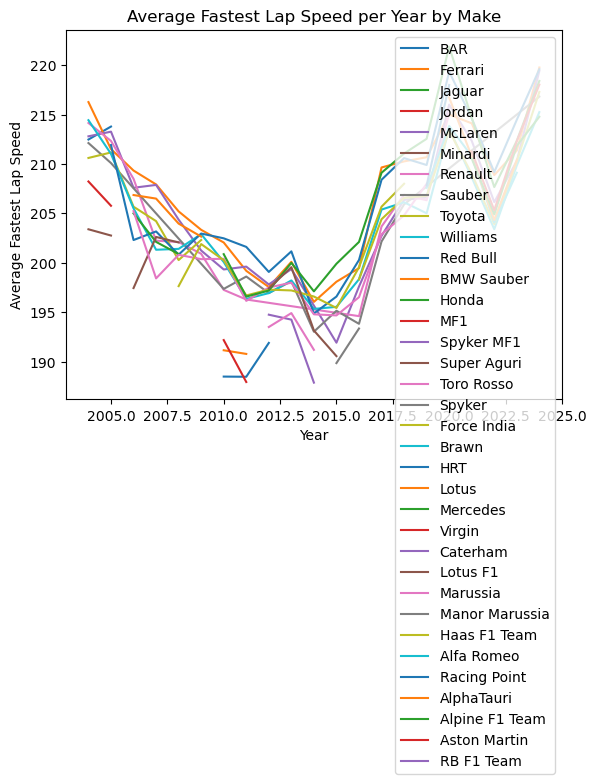

In [51]:
import matplotlib.pyplot as plt



average_lap_speed_per_year = (
    merged_race_data_df.groupby(['year', 'make'])['fastest_lap_speed'].mean().reset_index()
)

# Iterate through unique makes
for make in average_lap_speed_per_year['make'].unique():
  # Filter data for current make
  make_data = average_lap_speed_per_year[average_lap_speed_per_year['make'] == make]

  # Extract data for plotting
  years = make_data['year'].tolist()
  average_speeds = make_data['fastest_lap_speed'].tolist()git

  # Create line plot
  plt.plot(years, average_speeds, label=make)

# Customize plot (optional)
plt.xlabel('Year')
plt.ylabel('Average Fastest Lap Speed')
plt.title('Average Fastest Lap Speed per Year by Make')
plt.legend()
plt.show()

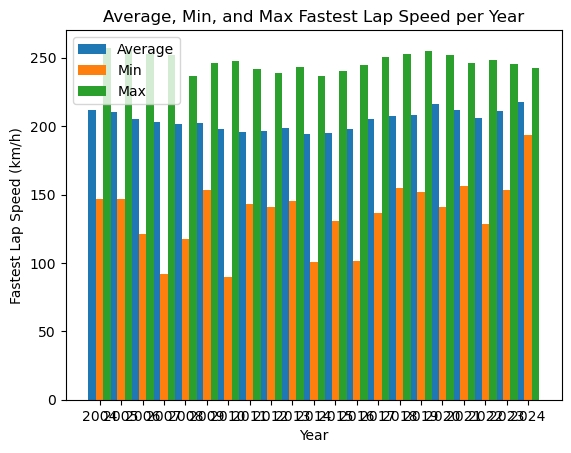

In [68]:
# Group data by year and calculate statistics
average_lap_speed_per_year = (
    merged_race_data_df.groupby('year')['fastest_lap_speed'].agg(
        avg='mean', min='min', max='max'
    ).reset_index()
)

# Extract data for plotting
years = average_lap_speed_per_year['year'].tolist()
average_speeds = average_lap_speed_per_year['avg'].tolist()
min_speeds = average_lap_speed_per_year['min'].tolist()
max_speeds = average_lap_speed_per_year['max'].tolist()

# Create bar chart (using bar width of 0.35 for clarity)
bar_width = 0.35
plt.bar(years, average_speeds, label='Average', width=bar_width)
plt.bar([p + bar_width for p in years], min_speeds, label='Min', width=bar_width)
plt.bar([p + 2 * bar_width for p in years], max_speeds, label='Max', width=bar_width)

# Customize plot
plt.xlabel('Year')
plt.ylabel('Fastest Lap Speed (km/h)')
plt.title('Average, Min, and Max Fastest Lap Speed per Year')
plt.xticks([p + bar_width for p in years], years)  # Adjust x-axis ticks for bar centers
plt.legend()
plt.show()